In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff


from pylab import rcParams
rcParams['figure.figsize'] = 10,5
plt.style.use('ggplot')

import plotly.graph_objs as go

import plotly
from plotly import tools

pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import homogeneity_score, silhouette_score, completeness_score, v_measure_score

from sklearn import cluster, datasets, mixture
# from sklearn.tree import DecisionTreeClassifier, export_graphviz
# from sklearn.neighbors import kneighbors_graph
# from itertools import cycle, islice
from scipy.spatial.distance import cosine

In [2]:
df = pd.read_csv('amazon_items_full.csv')
df

,name,asin,price,reviews_num,rating,age,description,link,category,brand,price_range,age_range,good_reviews,bad_reviews
0,Toniebox Starter Set Red with Creative Tonie,B07HBDNGHC,78.00,20439,4.8,3.0,listening games,https://www.amazon.de/dp/B07HBDNGHC,Boomboxes & MP3-Players,tonies,expensive,Toddlers,Auf die Funktion der Box gehe ich nur kurz ein...,Wenn man sich mittlerweile im Bekanntenkreis u...
1,PlayDoh modelling Clay,B07MV3DYGJ,12.59,47928,4.8,3.0,art,https://www.amazon.de/dp/B07MV3DYGJ,Kids' Art Clay & Dough,PlayDoh,cheap,Toddlers,Es gibt wohl keine bessere Knete als die von p...,Leider sind im Gegensatz zu der Produktbeschre...
2,Paw Patrol Fire Engine with Marshall Figure Ba...,B08T1VJ2L5,9.49,15200,4.6,3.0,Marshalls basic vehicle with individual movabl...,https://www.amazon.de/dp/B08T1VJ2L5,Play Figure Playsets,Paw Patrol,cheap,School age,Ein Weihnachtsgeschenk das unterm Baum liegen ...,kein Kommentar
3,tonies Toniebox Christmas Songs Rolf Zuckowski...,B08LSDKWRW,11.99,2077,4.9,3.0,Audio play Toniebox accessories the most popu...,https://www.amazon.de/dp/B08LSDKWRW,Boomboxes & MP3-Players,tonies,cheap,Toddlers,"Tolle Lieder, die wir schon vor 30 Jahren kann...",Die tonie war offenHätte mir mehr die Klassike...
4,Allnew Fire HD 8 Kids Pro tablet 8inch HD dis...,B09BG3FFD1,84.99,26,4.2,6.0,Fire HD 8 Kids ProTablet,https://www.amazon.de/dp/B09BG3FFD1,Amazon devices,Allnew Fire,expensive,School age,"Direkt bewerten kann ich noch nichts, da es si...",Am Tablet gibt es hardwaremässig nichts auszus...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Pokemon Cards 30 Different with 1 x Holo 1 x R...,B09YH9P4CF,6.50,286,4.6,14.0,Cards are packaged in a gift foil sleeve with ...,https://www.amazon.de/dp/B09YH9P4CF,Single Cards,Pokemon,cheap,Teenagers,Wie versprochen ist immer mind. 1 ganz tolle K...,"Pro: Nagelneue Karten, sichere Verpackung, der..."
396,PlayDoh Kitchen Creations Large Ice Cream Trol...,B09D5Y2WCY,94.90,136,4.6,3.0,A really cool play set this large ice cream tr...,https://www.amazon.de/dp/B09D5Y2WCY,Kids' Art Clay & Dough,PlayDoh,expensive,Toddlers,kein Kommentar,Youngest granddaughter's 4th birthday. She was...
397,KOSMOS Solar Bots Build 8 Solar Models Robot K...,B08T21B6P2,19.99,455,4.1,8.0,Cool action with the power of the sun Solar bo...,https://www.amazon.de/dp/B08T21B6P2,Learning & Education,KOSMOS,middle-priced,School age,Tolles GeschenkSuper GeschenkDer Zusammenbau i...,Unser Enkel ist 9 Jahre und technisch sehr int...
398,tonies Audio Figures for Toniebox Favourite Ch...,B09J5BJWY5,15.21,286,4.7,3.0,Cool animal songs,https://www.amazon.de/dp/B09J5BJWY5,Boomboxes & MP3-Players,tonies,middle-priced,Toddlers,War ein Geschenk 🎁 und ist super bei dem klein...,Die Figur ist herunter gafallen und klackert n...


In [3]:
df=df.drop(columns=['name', 'description','link',
       'good_reviews',
       'bad_reviews'], axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   asin         400 non-null    object 
 1   price        400 non-null    float64
 2   reviews_num  400 non-null    int64  
 3   rating       400 non-null    float64
 4   age          400 non-null    float64
 5   category     400 non-null    object 
 6   brand        400 non-null    object 
 7   price_range  400 non-null    object 
 8   age_range    400 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 28.2+ KB


In [5]:
df.columns

Index(['asin', 'price', 'reviews_num', 'rating', 'age', 'category', 'brand',
       'price_range', 'age_range'],
      dtype='object')

In [6]:
cat_cols=['asin', 'category', 'brand',
       'price_range', 'age_range']

for col in cat_cols:
    df[col] = df[col].astype('category').cat.codes

In [7]:
df

,asin,price,reviews_num,rating,age,category,brand,price_range,age_range
0,128,78.00,20439,4.8,3.0,6,111,1,3
1,148,12.59,47928,4.8,3.0,23,73,0,3
2,247,9.49,15200,4.6,3.0,29,70,0,1
3,234,11.99,2077,4.9,3.0,6,111,0,3
4,284,84.99,26,4.2,6.0,1,3,1,1
...,...,...,...,...,...,...,...,...,...
395,388,6.50,286,4.6,14.0,33,75,0,2
396,316,94.90,136,4.6,3.0,23,73,1,3
397,248,19.99,455,4.1,8.0,26,44,2,1
398,329,15.21,286,4.7,3.0,6,111,2,3


In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [9]:
df1 = df.copy()

In [10]:
df1.isnull().sum().sort_values(ascending=False)

asin           0
price          0
reviews_num    0
rating         0
age            0
category       0
brand          0
price_range    0
age_range      0
dtype: int64

In [11]:
# Random Color Generation Function
def generate_color():
    color = '#{:02x}{:02x}{:02x}'.format(*map(lambda x: random.randint(0, 255), range(3)))
    return color


# Cluster visualization and centroid calculation function
def plot_clusters(df_clust, labels, need_pca=True, name_alorithm = ''):
    
    # To visualize clusters of multidimensional objects, we reduce the dimension by the method of extracting principal components
    if need_pca:
        pca = PCA(2)
        pca.fit(df_clust)
        X_PCA = pca.transform(df_clust)
        x, y = X_PCA[:, 0], X_PCA[:, 1]
    else:
        x, y = df_clust[:, 0], df_clust[:, 1]

    # Assign a different color to each cluster on the chart
    clust = np.unique(labels)
    colors = {}
    if len(clust) == 4:
        colors[clust[0]] = 'red'
        colors[clust[1]] = 'blue'
        colors[clust[2]] = 'green'
        colors[clust[3]] = 'yellow'
    else:
        for i in range(len(clust)):
            colors[clust[i]] = generate_color()

    # chart
    df1 = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
    groups = df1.groupby('label')
    centroids = {}

    fig, ax = plt.subplots(figsize=(10, 10)) 

    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=4,
                color=colors[name],label='cluster ' + str(name), mec='none', zorder=-1)
        ax.set_aspect('auto')
        ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
        ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
        
        centroid = (sum(group.x)/len(group.x),sum(group.y)/len(group.y))
        centroids[name] = centroid
        ax.scatter(centroid[0], centroid[1], color='black', marker = 'X', s=200, zorder=1)
        
#     for i in range(len(centroids)):
#         ax.scatter(centroids[i][0], centroids[i][1], color='black', zorder=1)
    
    ax.legend()
    ax.set_title(name_alorithm + " Clusters of personas")
    plt.show()
    
    # Check clustering metrics
    silhouette = silhouette_score(df_clust, labels, metric='euclidean')
    homogeneity = homogeneity_score(labels_true=y, labels_pred=labels)
    completeness = completeness_score(labels_true=y, labels_pred=labels)
    v_measure = v_measure_score(labels_true=y, labels_pred=labels)

    print('silhouette = ', silhouette)
    print('homogeneity = ', homogeneity)
    print('completeness = ', completeness)
    print('v_measure = ', v_measure)
    
    dfc = pd.DataFrame(centroids)
    arr = []
    for i in range(len(dfc.columns)):
        arr.append(dfc[dfc.columns[i]].to_list())
    
    return arr
    
def get_centroid(x,y):
    return sum(x)/len(x),sum(y)/len(y)

In [12]:
# clustering
kmeans = KMeans(n_clusters=4,max_iter=300,random_state=42)
kmeans.fit(df)   
labels1 = kmeans.labels_.astype(np.int)

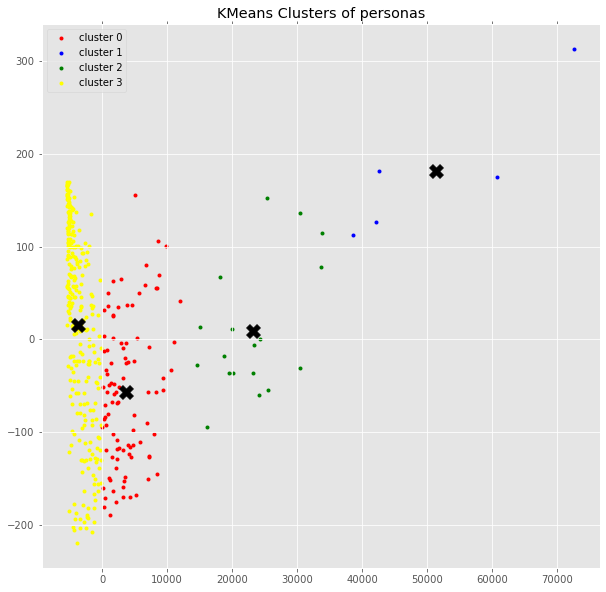

silhouette =  0.6617347630365512
homogeneity =  0.13144694479946986
completeness =  1.0000000000000007
v_measure =  0.2323519373199892
centroids: 
[[3635.4168113043092, -56.79327307212849], [51307.026966245365, 181.95143913749854], [23108.52720381163, 9.341076299639214], [-3661.1573399869785, 15.825181853269516]]


In [13]:
centroids1 = plot_clusters(df, labels1, name_alorithm = 'KMeans')
print('centroids: ')
print(centroids1)

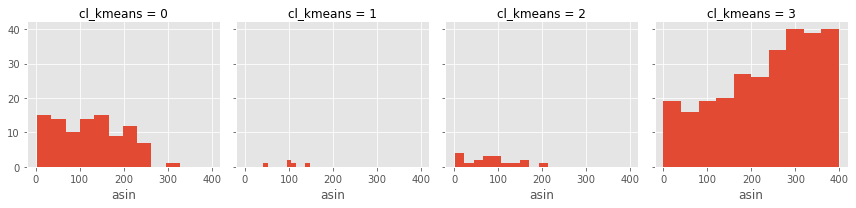

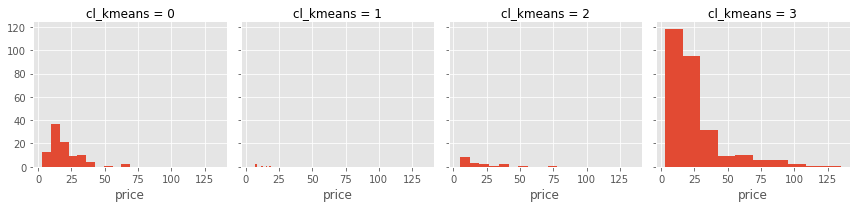

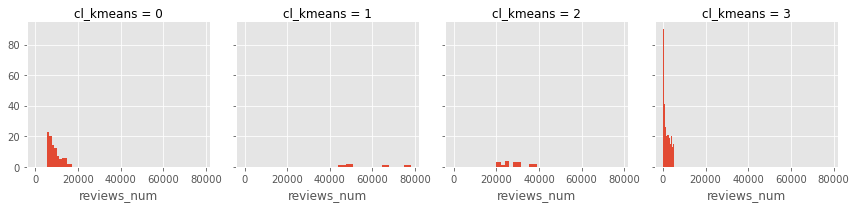

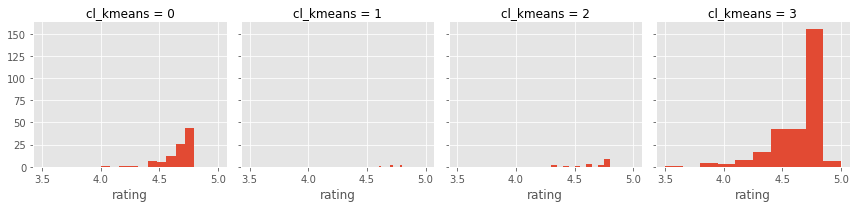

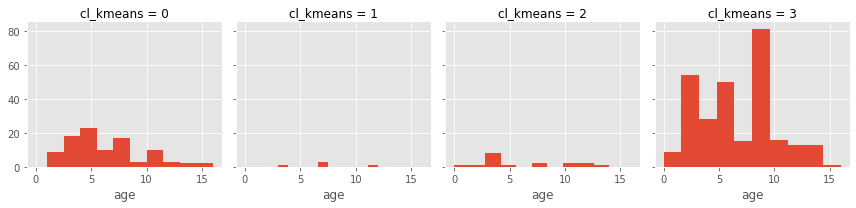

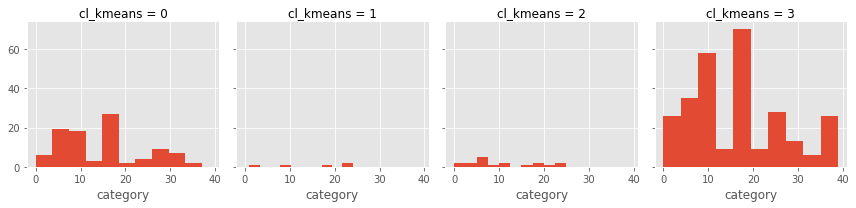

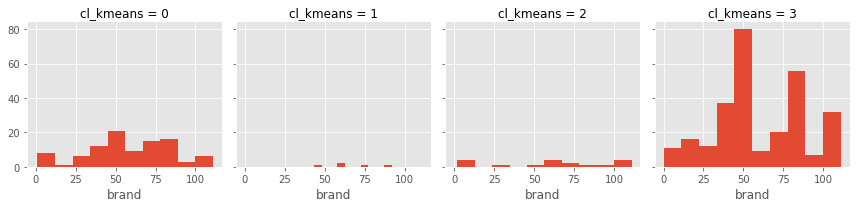

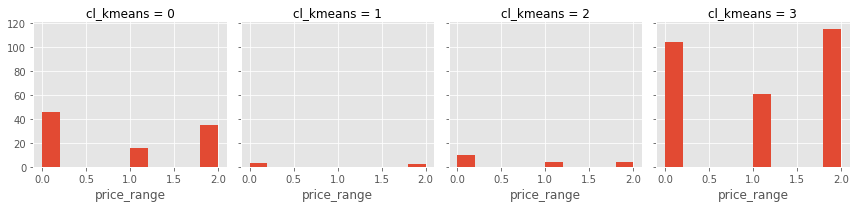

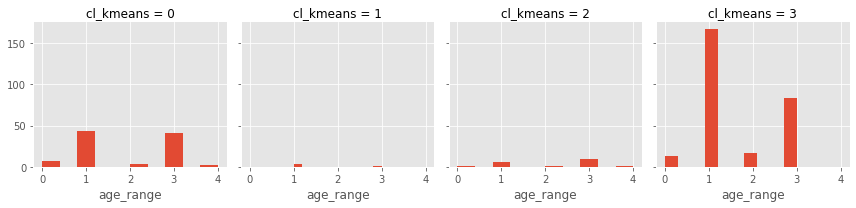

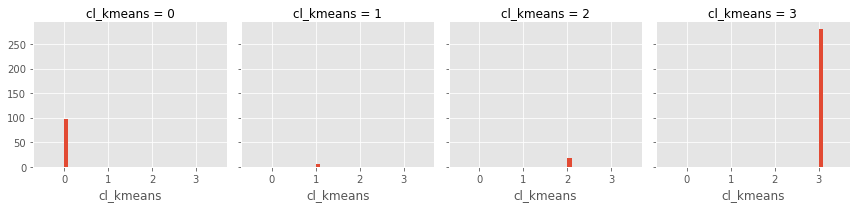

In [14]:
# Check the distribution of values for each feature for different clusters
df['cl_kmeans'] = labels1

for c in df:
    grid= sns.FacetGrid(df, col='cl_kmeans')
    grid.map(plt.hist, c)

KeyError: 'cl_kmeans'

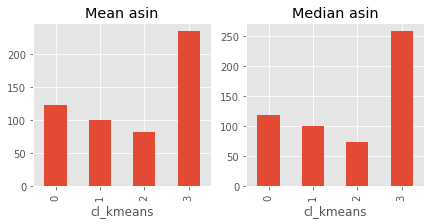

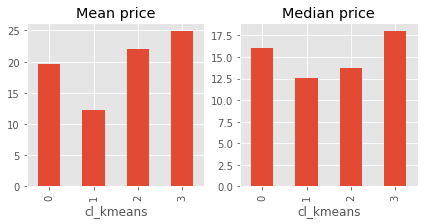

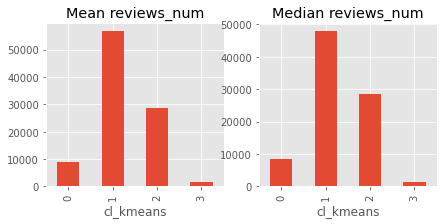

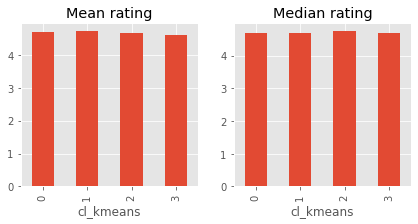

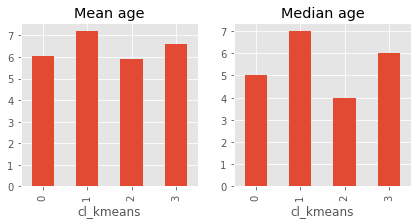

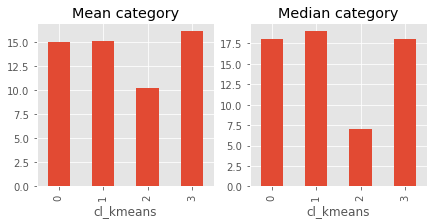

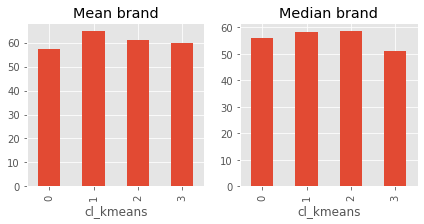

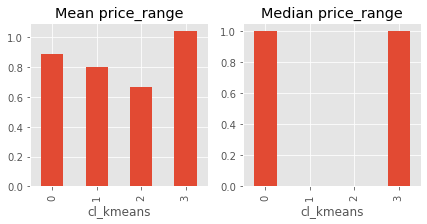

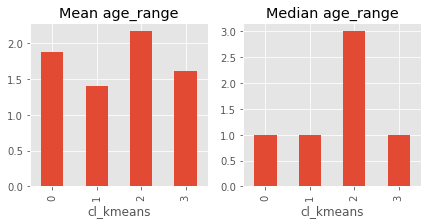

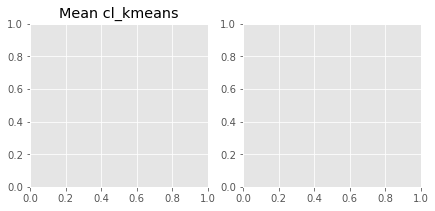

In [15]:
# For a quick interpretation of the result, we will display a comparison of the average values for each cluster 
for col in df.columns:
    fig, ax = plt.subplots(1, 2, figsize=(7,3))
    ax[0].set_title('Mean ' + col)
    df.groupby(by = 'cl_kmeans').mean()[col].plot(ax=ax[0], kind='bar')
    ax[1].set_title('Median ' + col)
    df.groupby(by = 'cl_kmeans').median()[col].plot(ax=ax[1], kind='bar')

In [16]:
# Let's check the quantitative distribution
df['cl_kmeans'].value_counts()

3    280
0     97
2     18
1      5
Name: cl_kmeans, dtype: int64